# Ironhack | Mid-Bootcamp Project - Bank Analysis

In [91]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

from scipy import stats
from sklearn.preprocessing import OneHotEncoder, Normalizer, MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_auc_score, roc_curve, auc

## Loading dataset

In [2]:
data = pd.read_excel('../files/creditcardmarketing.xlsx')
data.head()

,Customer Number,Offer Accepted,Reward,Mailer Type,Income Level,# Bank Accounts Open,Overdraft Protection,Credit Rating,# Credit Cards Held,# Homes Owned,Household Size,Own Your Home,Average Balance,Q1 Balance,Q2 Balance,Q3 Balance,Q4 Balance
0,1,No,Air Miles,Letter,High,1,No,High,2,1,4,No,1160.75,1669.0,877.0,1095.0,1002.0
1,2,No,Air Miles,Letter,Medium,1,No,Medium,2,2,5,Yes,147.25,39.0,106.0,78.0,366.0
2,3,No,Air Miles,Postcard,High,2,No,Medium,2,1,2,Yes,276.50,367.0,352.0,145.0,242.0
3,4,No,Air Miles,Letter,Medium,2,No,High,1,1,4,No,1219.00,1578.0,1760.0,1119.0,419.0
4,5,No,Air Miles,Letter,Medium,1,No,Medium,2,1,6,Yes,1211.00,2140.0,1357.0,982.0,365.0


In [3]:
new_cols = [x.lower().replace(' ', '_').replace('#', '') for x in data.columns]
new_cols

['customer_number',
 'offer_accepted',
 'reward',
 'mailer_type',
 'income_level',
 '_bank_accounts_open',
 'overdraft_protection',
 'credit_rating',
 '_credit_cards_held',
 '_homes_owned',
 'household_size',
 'own_your_home',
 'average_balance',
 'q1_balance',
 'q2_balance',
 'q3_balance',
 'q4_balance']

In [4]:
standard_cols = []
for item in new_cols:
    if item[0] == '_':
        standard_cols.append(item[1:])
    else:
        standard_cols.append(item)
standard_cols

['customer_number',
 'offer_accepted',
 'reward',
 'mailer_type',
 'income_level',
 'bank_accounts_open',
 'overdraft_protection',
 'credit_rating',
 'credit_cards_held',
 'homes_owned',
 'household_size',
 'own_your_home',
 'average_balance',
 'q1_balance',
 'q2_balance',
 'q3_balance',
 'q4_balance']

In [5]:
data.columns = standard_cols
data.head()

,customer_number,offer_accepted,reward,mailer_type,income_level,bank_accounts_open,overdraft_protection,credit_rating,credit_cards_held,homes_owned,household_size,own_your_home,average_balance,q1_balance,q2_balance,q3_balance,q4_balance
0,1,No,Air Miles,Letter,High,1,No,High,2,1,4,No,1160.75,1669.0,877.0,1095.0,1002.0
1,2,No,Air Miles,Letter,Medium,1,No,Medium,2,2,5,Yes,147.25,39.0,106.0,78.0,366.0
2,3,No,Air Miles,Postcard,High,2,No,Medium,2,1,2,Yes,276.50,367.0,352.0,145.0,242.0
3,4,No,Air Miles,Letter,Medium,2,No,High,1,1,4,No,1219.00,1578.0,1760.0,1119.0,419.0
4,5,No,Air Miles,Letter,Medium,1,No,Medium,2,1,6,Yes,1211.00,2140.0,1357.0,982.0,365.0


In [6]:
data.shape

(18000, 17)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18000 entries, 0 to 17999
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   customer_number       18000 non-null  int64  
 1   offer_accepted        18000 non-null  object 
 2   reward                18000 non-null  object 
 3   mailer_type           18000 non-null  object 
 4   income_level          18000 non-null  object 
 5   bank_accounts_open    18000 non-null  int64  
 6   overdraft_protection  18000 non-null  object 
 7   credit_rating         18000 non-null  object 
 8   credit_cards_held     18000 non-null  int64  
 9   homes_owned           18000 non-null  int64  
 10  household_size        18000 non-null  int64  
 11  own_your_home         18000 non-null  object 
 12  average_balance       17976 non-null  float64
 13  q1_balance            17976 non-null  float64
 14  q2_balance            17976 non-null  float64
 15  q3_balance         

In [8]:
data.describe(include='all')

,customer_number,offer_accepted,reward,mailer_type,income_level,bank_accounts_open,overdraft_protection,credit_rating,credit_cards_held,homes_owned,household_size,own_your_home,average_balance,q1_balance,q2_balance,q3_balance,q4_balance
count,18000.000000,18000,18000,18000,18000,18000.000000,18000,18000,18000.000000,18000.000000,18000.000000,18000,17976.000000,17976.000000,17976.000000,17976.000000,17976.000000
unique,NaN,2,3,2,3,NaN,2,3,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN
top,NaN,No,Air Miles,Postcard,Medium,NaN,No,High,NaN,NaN,NaN,Yes,NaN,NaN,NaN,NaN,NaN
freq,NaN,16977,6061,9147,9013,NaN,15322,6071,NaN,NaN,NaN,11655,NaN,NaN,NaN,NaN,NaN
mean,9000.500000,NaN,NaN,NaN,NaN,1.255778,NaN,NaN,1.903500,1.203444,3.499056,NaN,940.515562,910.450656,999.392190,1042.033600,810.185803
std,5196.296758,NaN,NaN,NaN,NaN,0.472501,NaN,NaN,0.797009,0.427341,1.114182,NaN,350.297837,620.077060,457.402268,553.452599,559.001365
min,1.000000,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,1.000000,1.000000,1.000000,NaN,48.250000,0.000000,0.000000,0.000000,0.000000
25%,4500.750000,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,1.000000,1.000000,3.000000,NaN,787.500000,392.750000,663.000000,633.000000,363.000000
50%,9000.500000,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,2.000000,1.000000,3.000000,NaN,1007.000000,772.000000,1032.000000,945.500000,703.000000
75%,13500.250000,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,2.000000,1.000000,4.000000,NaN,1153.250000,1521.000000,1342.000000,1463.000000,1212.000000


In [9]:
data.isna().sum()/len(data)*100

customer_number         0.000000
offer_accepted          0.000000
reward                  0.000000
mailer_type             0.000000
income_level            0.000000
bank_accounts_open      0.000000
overdraft_protection    0.000000
credit_rating           0.000000
credit_cards_held       0.000000
homes_owned             0.000000
household_size          0.000000
own_your_home           0.000000
average_balance         0.133333
q1_balance              0.133333
q2_balance              0.133333
q3_balance              0.133333
q4_balance              0.133333
dtype: float64

In [10]:
data[data['average_balance'].isna()]

,customer_number,offer_accepted,reward,mailer_type,income_level,bank_accounts_open,overdraft_protection,credit_rating,credit_cards_held,homes_owned,household_size,own_your_home,average_balance,q1_balance,q2_balance,q3_balance,q4_balance
323,324,No,Points,Postcard,Medium,1,No,High,1,1,4,No,NaN,NaN,NaN,NaN,NaN
3070,3071,Yes,Air Miles,Postcard,Low,3,No,Medium,2,1,4,Yes,NaN,NaN,NaN,NaN,NaN
3108,3109,No,Air Miles,Letter,Low,1,No,High,3,1,4,Yes,NaN,NaN,NaN,NaN,NaN
3789,3790,No,Air Miles,Letter,Medium,2,No,High,3,1,3,No,NaN,NaN,NaN,NaN,NaN
5083,5084,No,Points,Letter,Medium,1,No,High,1,1,3,Yes,NaN,NaN,NaN,NaN,NaN
5677,5678,No,Air Miles,Postcard,Low,1,No,Low,2,1,4,Yes,NaN,NaN,NaN,NaN,NaN
5689,5690,No,Air Miles,Postcard,Medium,1,No,Medium,3,1,5,No,NaN,NaN,NaN,NaN,NaN
6932,6933,No,Air Miles,Postcard,Medium,1,No,Medium,2,2,4,Yes,NaN,NaN,NaN,NaN,NaN
7787,7788,No,Air Miles,Letter,Low,2,No,Low,1,1,4,Yes,NaN,NaN,NaN,NaN,NaN
7864,7865,No,Cash Back,Postcard,High,2,Yes,Low,2,1,3,No,NaN,NaN,NaN,NaN,NaN


## Data Cleaning

In [11]:
# i think some numerical columns will be better used as categoricals:
# bank_accounts_open, credit_cards_held, homes_owned, household_size

# i'll drop column customer_number, since it will not be needed to build the machine learning model

# Since there is a small percentage of nulls in the dataset, i'll drop them entirely

In [12]:
data = data.drop('customer_number', axis=1)
data = data.dropna().reset_index(drop=True)

data['bank_accounts_open'] = data['bank_accounts_open'].astype('object')
data['credit_cards_held'] = data['credit_cards_held'].astype('object')
data['homes_owned'] = data['homes_owned'].astype('object')
data['household_size'] = data['household_size'].astype('object')

In [13]:
data.head()

,offer_accepted,reward,mailer_type,income_level,bank_accounts_open,overdraft_protection,credit_rating,credit_cards_held,homes_owned,household_size,own_your_home,average_balance,q1_balance,q2_balance,q3_balance,q4_balance
0,No,Air Miles,Letter,High,1,No,High,2,1,4,No,1160.75,1669.0,877.0,1095.0,1002.0
1,No,Air Miles,Letter,Medium,1,No,Medium,2,2,5,Yes,147.25,39.0,106.0,78.0,366.0
2,No,Air Miles,Postcard,High,2,No,Medium,2,1,2,Yes,276.50,367.0,352.0,145.0,242.0
3,No,Air Miles,Letter,Medium,2,No,High,1,1,4,No,1219.00,1578.0,1760.0,1119.0,419.0
4,No,Air Miles,Letter,Medium,1,No,Medium,2,1,6,Yes,1211.00,2140.0,1357.0,982.0,365.0


In [14]:
data.shape

(17976, 16)

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17976 entries, 0 to 17975
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   offer_accepted        17976 non-null  object 
 1   reward                17976 non-null  object 
 2   mailer_type           17976 non-null  object 
 3   income_level          17976 non-null  object 
 4   bank_accounts_open    17976 non-null  object 
 5   overdraft_protection  17976 non-null  object 
 6   credit_rating         17976 non-null  object 
 7   credit_cards_held     17976 non-null  object 
 8   homes_owned           17976 non-null  object 
 9   household_size        17976 non-null  object 
 10  own_your_home         17976 non-null  object 
 11  average_balance       17976 non-null  float64
 12  q1_balance            17976 non-null  float64
 13  q2_balance            17976 non-null  float64
 14  q3_balance            17976 non-null  float64
 15  q4_balance         

In [16]:
for col in data.select_dtypes(np.object).columns:
    print(data[col].value_counts(),'\n')

No     16955
Yes     1021
Name: offer_accepted, dtype: int64 

Air Miles    6047
Cash Back    5995
Points       5934
Name: reward, dtype: int64 

Postcard    9134
Letter      8842
Name: mailer_type, dtype: int64 

Medium    9002
High      4519
Low       4455
Name: income_level, dtype: int64 

1    13674
2     4007
3      295
Name: bank_accounts_open, dtype: int64 

No     15300
Yes     2676
Name: overdraft_protection, dtype: int64 

High      6064
Medium    5964
Low       5948
Name: credit_rating, dtype: int64 

2    7933
1    6147
3    3381
4     515
Name: credit_cards_held, dtype: int64 

1    14502
2     3289
3      185
Name: homes_owned, dtype: int64 

3    5705
4    5532
5    2851
2    2809
1     539
6     538
8       1
9       1
Name: household_size, dtype: int64 

Yes    11636
No      6340
Name: own_your_home, dtype: int64 



In [17]:
# There is a huge imbalance in the dataset: only 1021 records for offer accepted and almost 17000 records for offer not accepted

# bank_accounts_open: relabel the categories as 1 and 2+

# credit_cards_held: relabel categories as 1, 2 and 3+

# homes_onwned: relabel categories as 1 and 2+

# household_size: relabel categories as "2 or less", 3, 4 and 5+

In [18]:
def relabel_bank_acc_open(x):
    if x == 1:
        return str(x)
    else:
        return '2+'
    
data['bank_accounts_open'] = list(map(relabel_bank_acc_open, data['bank_accounts_open']))

In [19]:
def relabel_cred_cards_held(x):
    if x == 1 or x == 2:
        return str(x)
    else:
        return '3+'
    
data['credit_cards_held'] = list(map(relabel_cred_cards_held, data['credit_cards_held']))

In [20]:
def relabel_homes_owned(x):
    if x == 1:
        return str(x)
    else:
        return '2+'

data['homes_owned'] = list(map(relabel_homes_owned, data['homes_owned']))

In [21]:
def relabel_house_size(x):
    if x == 1 or x == 2:
        return '2 or less'
    elif x == 3 or x == 4:
        return str(x)
    else:
        return '5+'
    
data['household_size'] = list(map(relabel_house_size, data['household_size']))

In [22]:
for col in data.select_dtypes(np.object).columns:
    print(data[col].value_counts(),'\n')

No     16955
Yes     1021
Name: offer_accepted, dtype: int64 

Air Miles    6047
Cash Back    5995
Points       5934
Name: reward, dtype: int64 

Postcard    9134
Letter      8842
Name: mailer_type, dtype: int64 

Medium    9002
High      4519
Low       4455
Name: income_level, dtype: int64 

1     13674
2+     4302
Name: bank_accounts_open, dtype: int64 

No     15300
Yes     2676
Name: overdraft_protection, dtype: int64 

High      6064
Medium    5964
Low       5948
Name: credit_rating, dtype: int64 

2     7933
1     6147
3+    3896
Name: credit_cards_held, dtype: int64 

1     14502
2+     3474
Name: homes_owned, dtype: int64 

3            5705
4            5532
5+           3391
2 or less    3348
Name: household_size, dtype: int64 

Yes    11636
No      6340
Name: own_your_home, dtype: int64 



average_balance


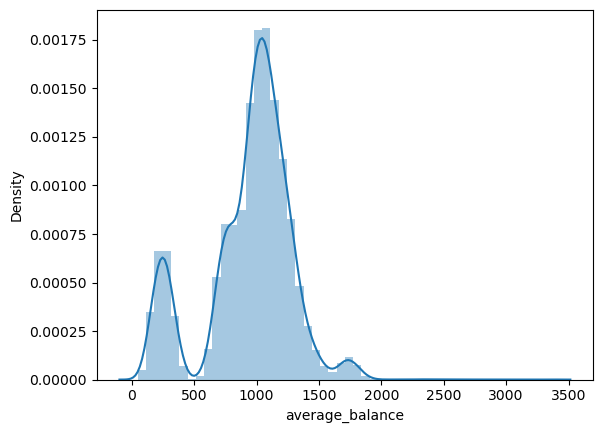

q1_balance


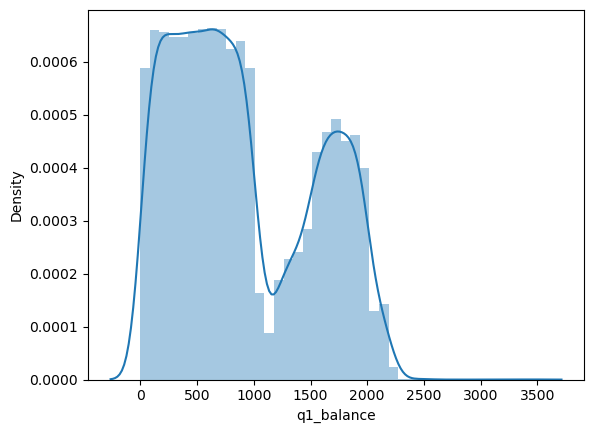

q2_balance


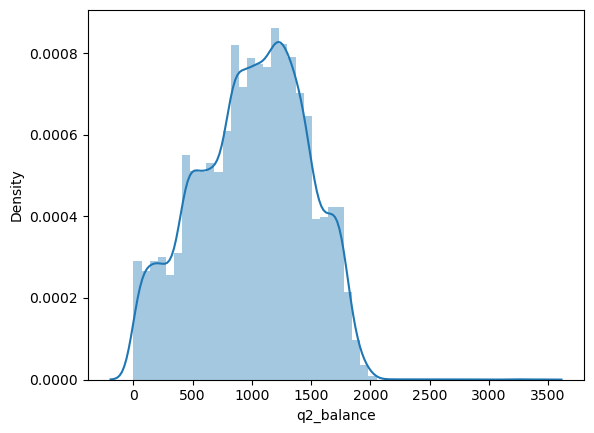

q3_balance


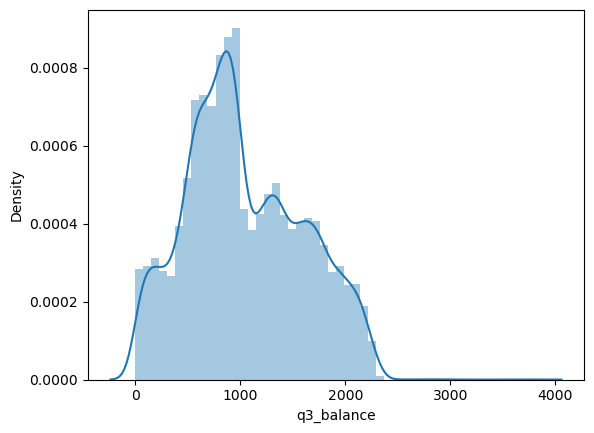

q4_balance


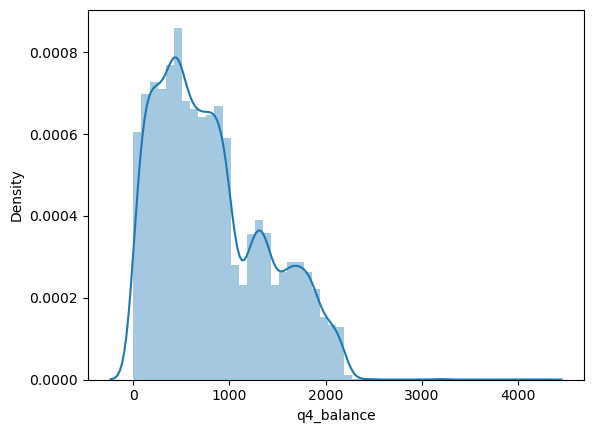

In [23]:
for col in data.select_dtypes(np.number).columns:
    print(col)
    sns.distplot(data[col])
    plt.show()

In [24]:
def power_transf(x):
    return np.sqrt(x)

def log_transf(x):
    return np.log(x+1)

def boxcox_transf(x):
    return pd.Series(stats.boxcox(x+1)[0])

average_balance


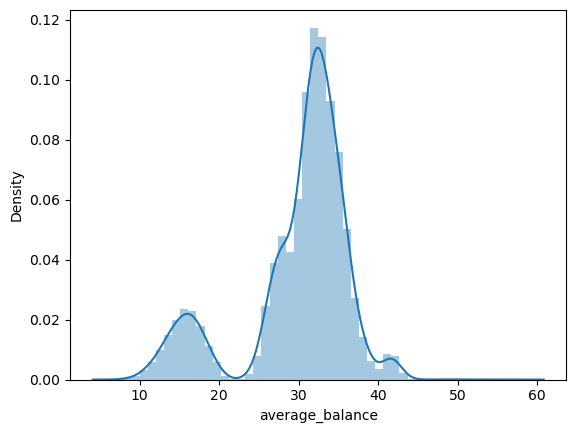

q1_balance


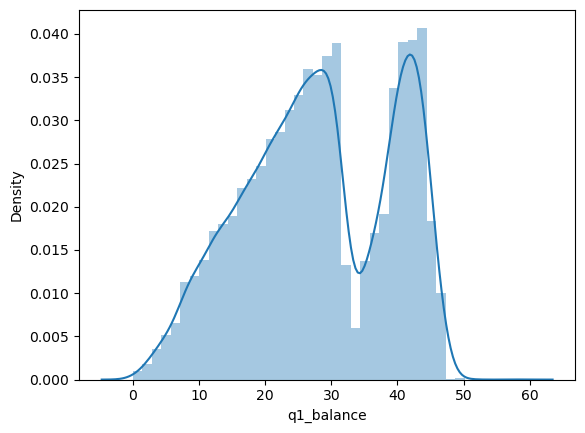

q2_balance


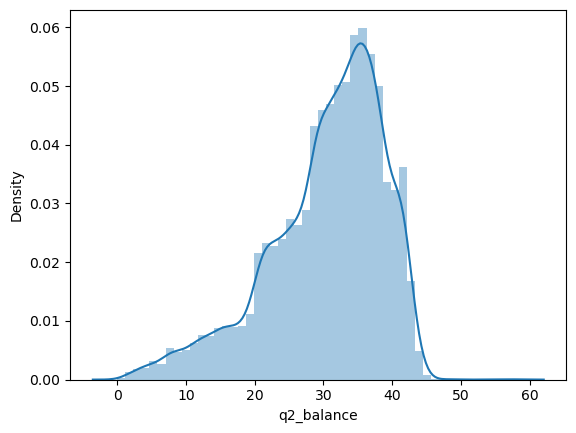

q3_balance


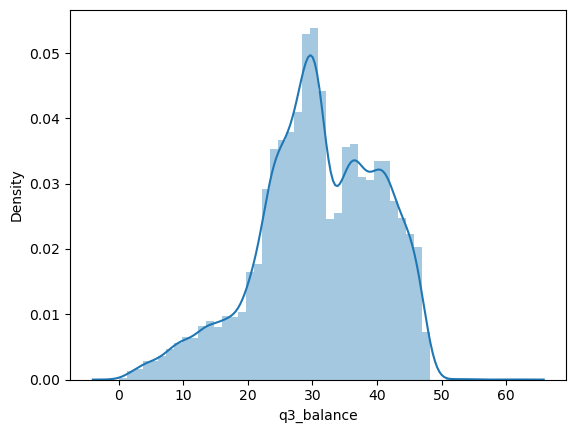

q4_balance


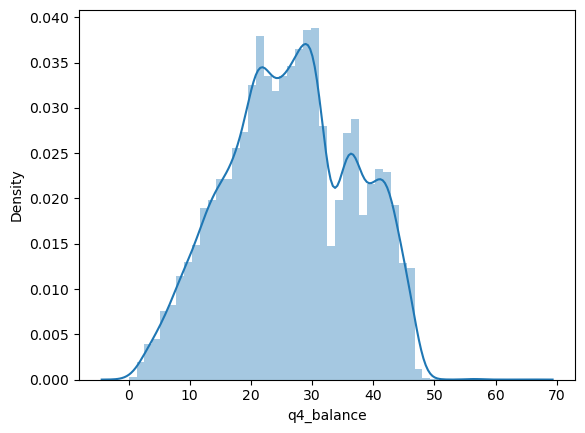

In [25]:
# Checking distributions after power transformation

for col in data.select_dtypes(np.number).columns:
    print(col)
    sns.distplot(power_transf(data[col]))
    plt.show()

average_balance


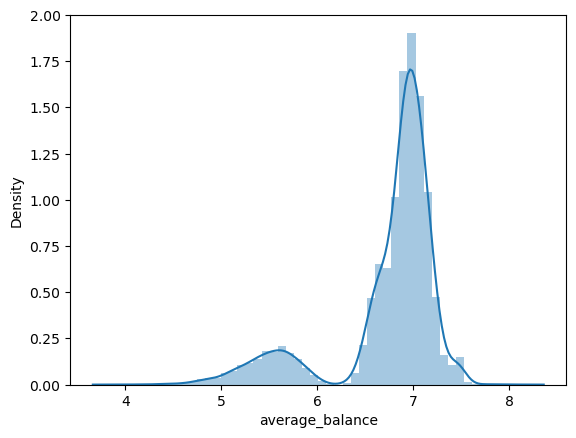

q1_balance


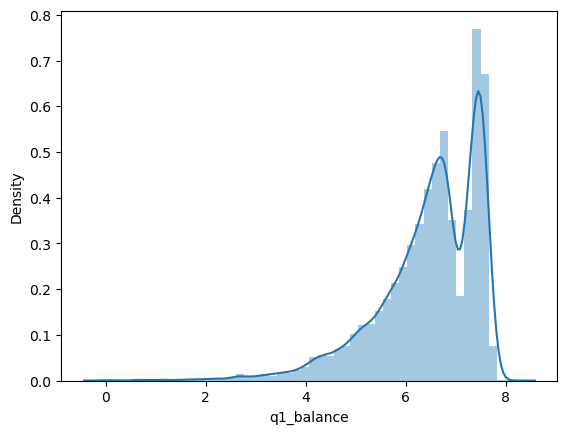

q2_balance


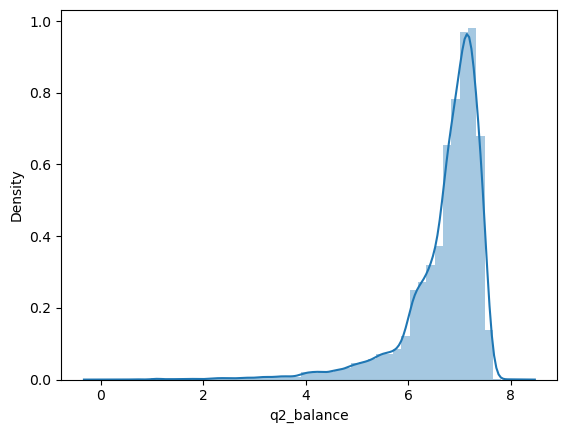

q3_balance


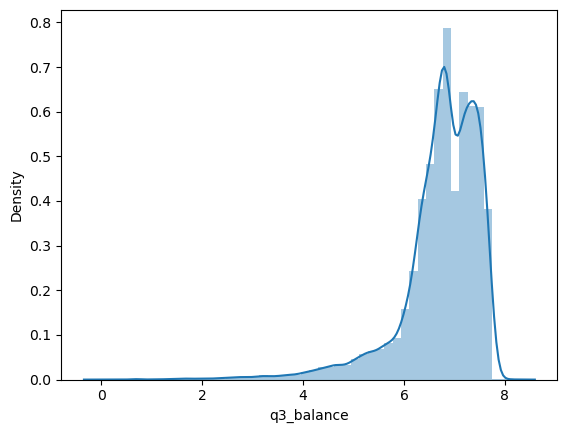

q4_balance


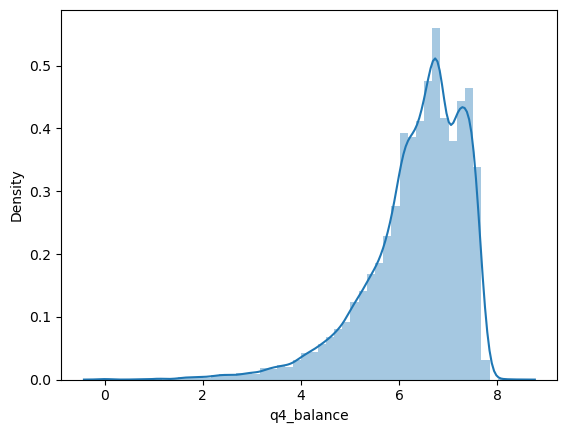

In [26]:
# Checking distributions after log transformation

for col in data.select_dtypes(np.number).columns:
    print(col)
    sns.distplot(log_transf(data[col]))
    plt.show()

average_balance


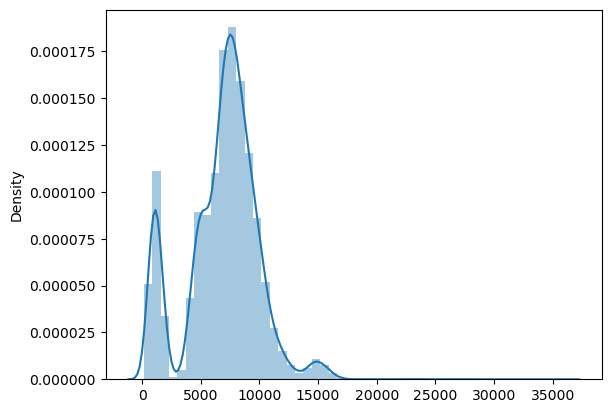

q1_balance


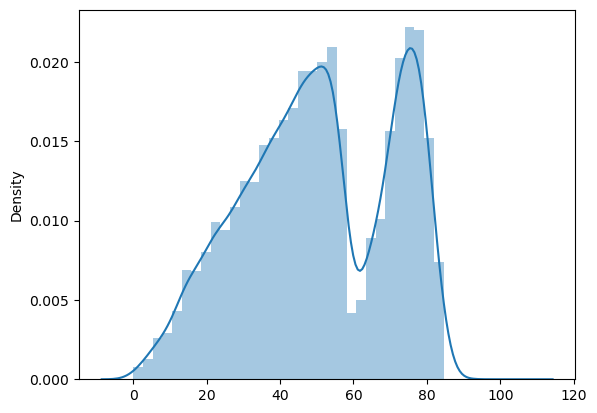

q2_balance


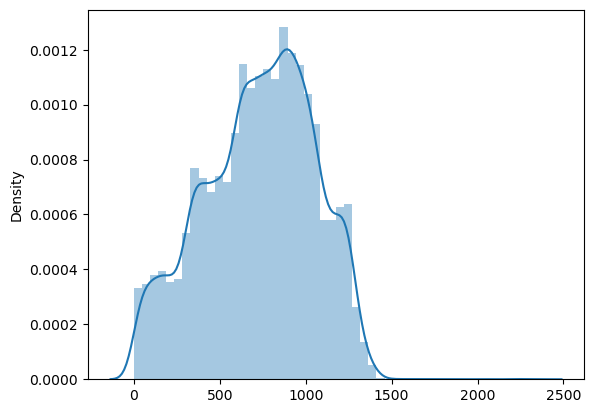

q3_balance


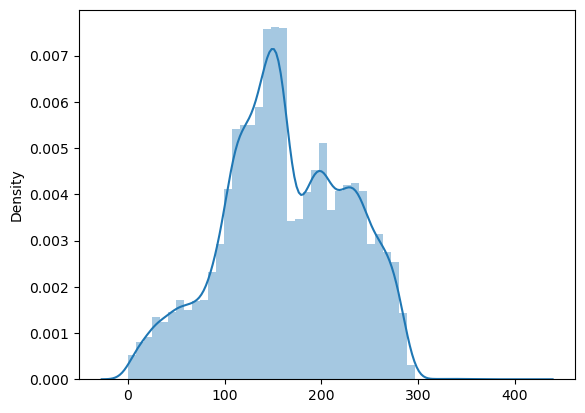

q4_balance


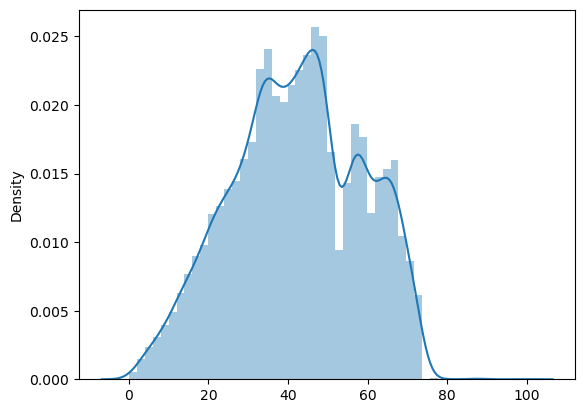

In [27]:
# Checking distributions after boxcox transformation

for col in data.select_dtypes(np.number).columns:
    print(col)
    sns.distplot(boxcox_transf(data[col]))
    plt.show()

In [28]:
# None of the transformations worked. I'll keep these columns as it is.

In [29]:
categoricals = data.select_dtypes(np.object)
categoricals.head()

,offer_accepted,reward,mailer_type,income_level,bank_accounts_open,overdraft_protection,credit_rating,credit_cards_held,homes_owned,household_size,own_your_home
0,No,Air Miles,Letter,High,1,No,High,2,1,4,No
1,No,Air Miles,Letter,Medium,1,No,Medium,2,2+,5+,Yes
2,No,Air Miles,Postcard,High,2+,No,Medium,2,1,2 or less,Yes
3,No,Air Miles,Letter,Medium,2+,No,High,1,1,4,No
4,No,Air Miles,Letter,Medium,1,No,Medium,2,1,5+,Yes


<Axes: >

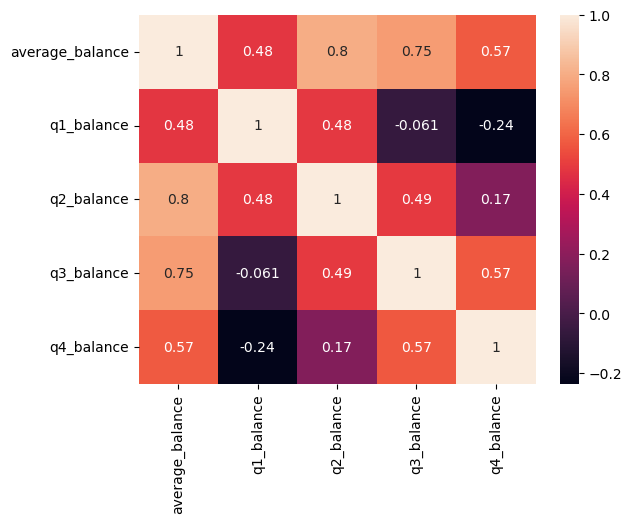

In [30]:
numericals = data.select_dtypes(np.number)
sns.heatmap(numericals.corr(), annot=True)

In [31]:
# looking at the correlation matrix there is no high correlation between the features

In [32]:
np.array(numericals)

array([[1160.75, 1669.  ,  877.  , 1095.  , 1002.  ],
       [ 147.25,   39.  ,  106.  ,   78.  ,  366.  ],
       [ 276.5 ,  367.  ,  352.  ,  145.  ,  242.  ],
       ...,
       [1087.25,  918.  ,  767.  , 1170.  , 1494.  ],
       [1022.25,  626.  ,  983.  ,  865.  , 1615.  ],
       [1056.  ,  265.  , 1378.  , 1978.  ,  603.  ]])

In [33]:
numericals.isna().sum()

average_balance    0
q1_balance         0
q2_balance         0
q3_balance         0
q4_balance         0
dtype: int64

In [34]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

for i in range(numericals.shape[1]):
    vif = variance_inflation_factor(np.array(numericals), i)
    print("Vif for column", numericals.columns[i], "= ", vif)

Vif for column average_balance =  inf
Vif for column q1_balance =  inf
Vif for column q2_balance =  inf
Vif for column q3_balance =  inf
Vif for column q4_balance =  inf


In [35]:
numericals.head()

,average_balance,q1_balance,q2_balance,q3_balance,q4_balance
0,1160.75,1669.0,877.0,1095.0,1002.0
1,147.25,39.0,106.0,78.0,366.0
2,276.50,367.0,352.0,145.0,242.0
3,1219.00,1578.0,1760.0,1119.0,419.0
4,1211.00,2140.0,1357.0,982.0,365.0


In [36]:
numericals['x'] = (numericals['q1_balance'] + numericals['q2_balance'] + numericals['q3_balance'] + numericals['q4_balance']) /4
numericals.head(10)

,average_balance,q1_balance,q2_balance,q3_balance,q4_balance,x
0,1160.75,1669.0,877.0,1095.0,1002.0,1160.75
1,147.25,39.0,106.0,78.0,366.0,147.25
2,276.50,367.0,352.0,145.0,242.0,276.50
3,1219.00,1578.0,1760.0,1119.0,419.0,1219.00
4,1211.00,2140.0,1357.0,982.0,365.0,1211.00
5,1114.75,1847.0,1365.0,750.0,497.0,1114.75
6,283.75,468.0,188.0,347.0,132.0,283.75
7,278.50,132.0,391.0,285.0,306.0,278.50
8,1005.00,894.0,891.0,882.0,1353.0,1005.00
9,974.25,1814.0,1454.0,514.0,115.0,974.25


In [37]:
numericals = numericals.drop(['average_balance', 'x'], axis=1)
numericals.head()

,q1_balance,q2_balance,q3_balance,q4_balance
0,1669.0,877.0,1095.0,1002.0
1,39.0,106.0,78.0,366.0
2,367.0,352.0,145.0,242.0
3,1578.0,1760.0,1119.0,419.0
4,2140.0,1357.0,982.0,365.0


In [38]:
for i in range(numericals.shape[1]):
    vif = variance_inflation_factor(np.array(numericals), i)
    print("Vif for column", numericals.columns[i], "= ", vif)

Vif for column q1_balance =  4.354688861452049
Vif for column q2_balance =  11.01021852011566
Vif for column q3_balance =  8.775199955412644
Vif for column q4_balance =  4.3887927871248795


In [39]:
clean_data = pd.concat([categoricals, numericals], axis=1)
clean_data.head()

,offer_accepted,reward,mailer_type,income_level,bank_accounts_open,overdraft_protection,credit_rating,credit_cards_held,homes_owned,household_size,own_your_home,q1_balance,q2_balance,q3_balance,q4_balance
0,No,Air Miles,Letter,High,1,No,High,2,1,4,No,1669.0,877.0,1095.0,1002.0
1,No,Air Miles,Letter,Medium,1,No,Medium,2,2+,5+,Yes,39.0,106.0,78.0,366.0
2,No,Air Miles,Postcard,High,2+,No,Medium,2,1,2 or less,Yes,367.0,352.0,145.0,242.0
3,No,Air Miles,Letter,Medium,2+,No,High,1,1,4,No,1578.0,1760.0,1119.0,419.0
4,No,Air Miles,Letter,Medium,1,No,Medium,2,1,5+,Yes,2140.0,1357.0,982.0,365.0


## Balancing data

In [40]:
clean_data_yes = clean_data[clean_data['offer_accepted'] == 'Yes']
clean_data_yes.shape

(1021, 15)

In [41]:
clean_data_no = clean_data[clean_data['offer_accepted'] == 'No']
clean_data_no.shape

(16955, 15)

### Upsampling yes

In [42]:
clean_data_no.shape[0]

16955

In [43]:
data_yes_ups = clean_data_yes.sample(clean_data_no.shape[0], replace=True).reset_index(drop=True)
data_yes_ups.tail()

,offer_accepted,reward,mailer_type,income_level,bank_accounts_open,overdraft_protection,credit_rating,credit_cards_held,homes_owned,household_size,own_your_home,q1_balance,q2_balance,q3_balance,q4_balance
16950,Yes,Points,Postcard,Medium,1,No,High,2,1,3,No,342.0,1233.0,806.0,1734.0
16951,Yes,Air Miles,Postcard,Low,1,No,Low,3+,1,4,No,456.0,153.0,296.0,381.0
16952,Yes,Air Miles,Letter,Medium,1,No,Low,1,2+,4,No,892.0,1175.0,1205.0,1861.0
16953,Yes,Points,Postcard,High,1,No,Medium,2,1,5+,Yes,1901.0,1551.0,1215.0,465.0
16954,Yes,Air Miles,Letter,Medium,1,No,Low,1,1,4,Yes,806.0,929.0,987.0,749.0


In [44]:
data_ups = pd.concat([data_yes_ups, clean_data_no], axis=0).reset_index(drop=True)
data_ups.shape

(33910, 15)

## Pre-processing

In [45]:
features = data_ups.drop('offer_accepted', axis=1)
target = data_ups['offer_accepted']

### Scaling

In [46]:
scaler = StandardScaler().fit_transform(features.select_dtypes(np.number))
scaled = pd.DataFrame(scaler)
scaled.head()

,0,1,2,3
0,-0.033209,-0.566646,-0.568243,-0.324650
1,1.568481,0.309475,-0.762721,-0.748445
2,-0.000917,1.172585,1.588855,1.054936
3,-0.228576,-0.891938,-0.814463,-0.234481
4,-1.260310,0.170684,-0.338081,0.634748


### Encoding

In [49]:
features.head()

,reward,mailer_type,income_level,bank_accounts_open,overdraft_protection,credit_rating,credit_cards_held,homes_owned,household_size,own_your_home,q1_balance,q2_balance,q3_balance,q4_balance
0,Cash Back,Postcard,Low,1,No,Medium,3+,1,4,Yes,866.0,736.0,734.0,633.0
1,Air Miles,Letter,Low,1,No,Medium,1,1,4,Yes,1858.0,1140.0,625.0,398.0
2,Points,Postcard,Medium,1,Yes,Low,3+,1,4,Yes,886.0,1538.0,1943.0,1398.0
3,Air Miles,Letter,Low,1,No,Medium,2,1,3,Yes,745.0,586.0,596.0,683.0
4,Points,Postcard,Medium,1,No,High,3+,1,3,Yes,106.0,1076.0,863.0,1165.0


In [48]:
encoder = OneHotEncoder(drop='first').fit_transform(features.select_dtypes(np.object)).toarray()
encoded = pd.DataFrame(encoder)
encoded.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
4,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0


In [50]:
features_consolidated = pd.concat([scaled, encoded], axis=1)
features_consolidated.head()

,0,1,2,3,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,-0.033209,-0.566646,-0.568243,-0.324650,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
1,1.568481,0.309475,-0.762721,-0.748445,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2,-0.000917,1.172585,1.588855,1.054936,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
3,-0.228576,-0.891938,-0.814463,-0.234481,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
4,-1.260310,0.170684,-0.338081,0.634748,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0


## Logistic Regression

In [61]:
X_train, X_test, y_train, y_test = train_test_split(features_consolidated, target, test_size=0.25, random_state=42)

In [68]:
model_1 = LogisticRegression(solver='liblinear').fit(X_train, y_train)

In [78]:
model_1.score(X_test, y_test)

0.6989856098136353

In [69]:
predictions_1 = model_1.predict(X_test)

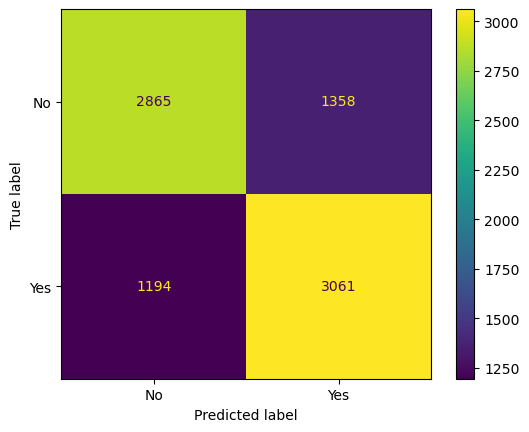

In [86]:
ConfusionMatrixDisplay(confusion_matrix(y_test, predictions_1), display_labels=['No', 'Yes']).plot()

In [90]:
predictions_1_probs = model_1.predict_proba(X_test)[:,1]
predictions_1_probs

array([0.80650359, 0.33255504, 0.80374763, ..., 0.47346229, 0.39563851,
       0.5906212 ])

In [101]:
fpr1, tpr1, thresholds1 = roc_curve(y_test, predictions_1_probs, pos_label='Yes')

In [102]:
roc_auc1 = auc(fpr1, tpr1)
roc_auc

0.7642563957155892

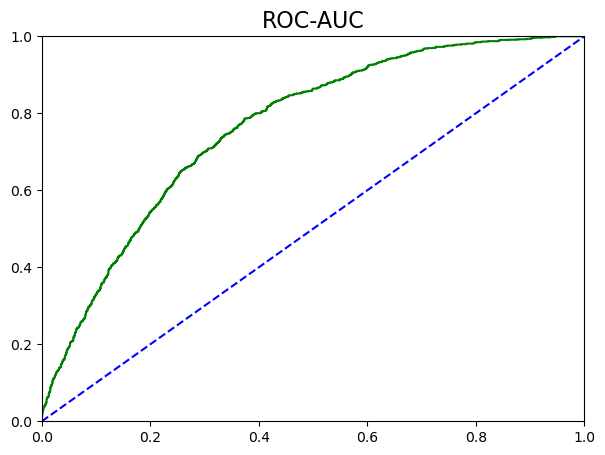

In [103]:
plt.figure(figsize=(7,5))
plt.plot(fpr1, tpr1, color='g')
plt.plot([0,1], [0,1], color='b', ls='--')
plt.title('ROC-AUC', fontsize=16)
plt.ylim(0,1)
plt.xlim(0,1)
plt.show()